# Analysis of Heart Disease Dataset 

https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots
np.random.seed(123) #ensure reproducibility

In [18]:
df1 = pd.read_csv("heart.csv")
df1

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    1   1       130   266    0        1      171      0      0.6   
13    64    1   3       110   211    0        0      144      1      1.8   
14    58    0   3       150   283    1        0      162      0      1.0   
15    50    0   2       120   219    0        1      158      0      1.6   
16    58    0   2       120   340    0        1      172      0      0.0   
17    66    0   3       150   226    0        1      114      0      2.6   
18    43    1   0       150   247    0        1      171      0      1.5   
19    69    0   3       140   239    0        1      151      0      1.8   
20    59    1   0       135   234    0        1      161      0      0.5   
21    44    1   2       130   233    0        1      179      1      0.4   
22    42    1   0       140   226    0        1      178      0      0.0   
23    61    1   2       150   243    1        1      137      1      1.0   
24    40    1   3       140   199    0        1      178      1      1.4   
25    71    0   1       160   302    0        1      162      0      0.4   
26    59    1   2       150   212    1        1      157      0      1.6   
27    51    1   2       110   175    0        1      123      0      0.6   
28    65    0   2       140   417    1        0      157      0      0.8   
29    53    1   2       130   197    1        0      152      0      1.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
273   58    1   0       100   234    0        1      156      0      0.1   
274   47    1   0       110   275    0        0      118      1      1.0   
275   52    1   0       125   212    0        1      168      0      1.0   
276   58    1   0       146   218    0        1      105      0      2.0   
277   57    1   1       124   261    0        1      141      0      0.3   
278   58    0   1       136   319    1        0      152      0      0.0   
279   61    1   0       138   166    0        0      125      1      3.6   
280   42    1   0       136   315    0        1      125      1      1.8   
281   52    1   0       128   204    1        1      156      1      1.0   
282   59    1   2       126   218    1        1      134      0      2.2   
283   40    1   0       152   223    0        1      181      0      0.0   
284   61    1   0       140   207    0        0      138      1      1.9   
285   46    1   0       140   311    0        1      120      1      1.8   
286   59    1   3       134   204    0        1      162      0      0.8   
287   57    1   1       154   232    0        0      164      0      0.0   
288   57    1   0       110   335    0        1      143      1      3.0   
289   55    0   0       128   205    0        2      130      1      2.0   
290   61    1   0       148   203    0        1      161      0      0.0   
291   58    1   0       114   318    0        2      140      0      4.4   
292   58    0   0       170   225    1        0      146      1      2.8   
293   67    1   2       152   212    0        0      

## Explanation of Data From Kaggle Website

#### age
age in years
#### sex
(1 = male; 0 = female)
#### cp
chest pain type
#### trestbps
resting blood pressure (in mm Hg on admission to the hospital)
#### chol
serum cholestoral in mg/dl
#### fbs
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#### restecg
resting electrocardiographic results
#### thalach
maximum heart rate achieved
#### exang
exercise induced angina (1 = yes; 0 = no)
#### oldpeak
ST depression induced by exercise relative to rest
#### slope
the slope of the peak exercise ST segment
#### ca
number of major vessels (0-3) colored by flourosopy
#### thal
3 = normal; 6 = fixed defect; 7 = reversable defect
#### target
1 or 0 

In [19]:
# Clean up the column names

df1.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [20]:
df1

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     63    1                3                     145          233   
1     37    1                2                     130          250   
2     41    0                1                     130          204   
3     56    1                1                     120          236   
4     57    0                0                     120          354   
5     57    1                0                     140          192   
6     56    0                1                     140          294   
7     44    1                1                     120          263   
8     52    1                2                     172          199   
9     57    1                2                     150          168   
10    54    1                0                     140          239   
11    48    0                2                     130          275   
12    49    1                1                     130          266   
13    64    1                3                     110          211   
14    58    0                3                     150          283   
15    50    0                2                     120          219   
16    58    0                2                     120          340   
17    66    0                3                     150          226   
18    43    1                0                     150          247   
19    69    0                3                     140          239   
20    59    1                0                     135          234   
21    44    1                2                     130          233   
22    42    1                0                     140          226   
23    61    1                2                     150          243   
24    40    1                3                     140          199   
25    71    0                1                     160          302   
26    59    1                2                     150          212   
27    51    1                2                     110          175   
28    65    0                2                     140          417   
29    53    1                2                     130          197   
..   ...  ...              ...                     ...          ...   
273   58    1                0                     100          234   
274   47    1                0                     110          275   
275   52    1                0                     125          212   
276   58    1                0                     146          218   
277   57    1                1                     124          261   
278   58    0                1                     136          319   
279   61    1                0                     138          166   
280   42    1                0                     136          315   
281   52    1                0                     128          204   
282   59    1                2                     126          218   
283   40    1                0                     152          223   
284   61    1                0                     140          207   
285   46    1                0                     140          311   
286   59    1                3                     134          204   
287   57    1                1                     154          232   
288   57    1                0                     110          335   
289   55    0                0                     128          205   
290   61    1                0                     148          203   
291   58    1                0                     114          318   
292   58    0                0                     170          225   
293   67    1                2                     152          212   
294   44    1                0                     120          169   
295   63    1                0                     140          187   
296   63    0                0                     124          197   
297   59    1                

## Naive Bayes

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('target', 1), df1['target'], test_size = .2, random_state=10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# This dataset doesnt have that much data to work with
# Already one area for an improved analysis would be more data

(242, 13) (61, 13) (242,) (61,)


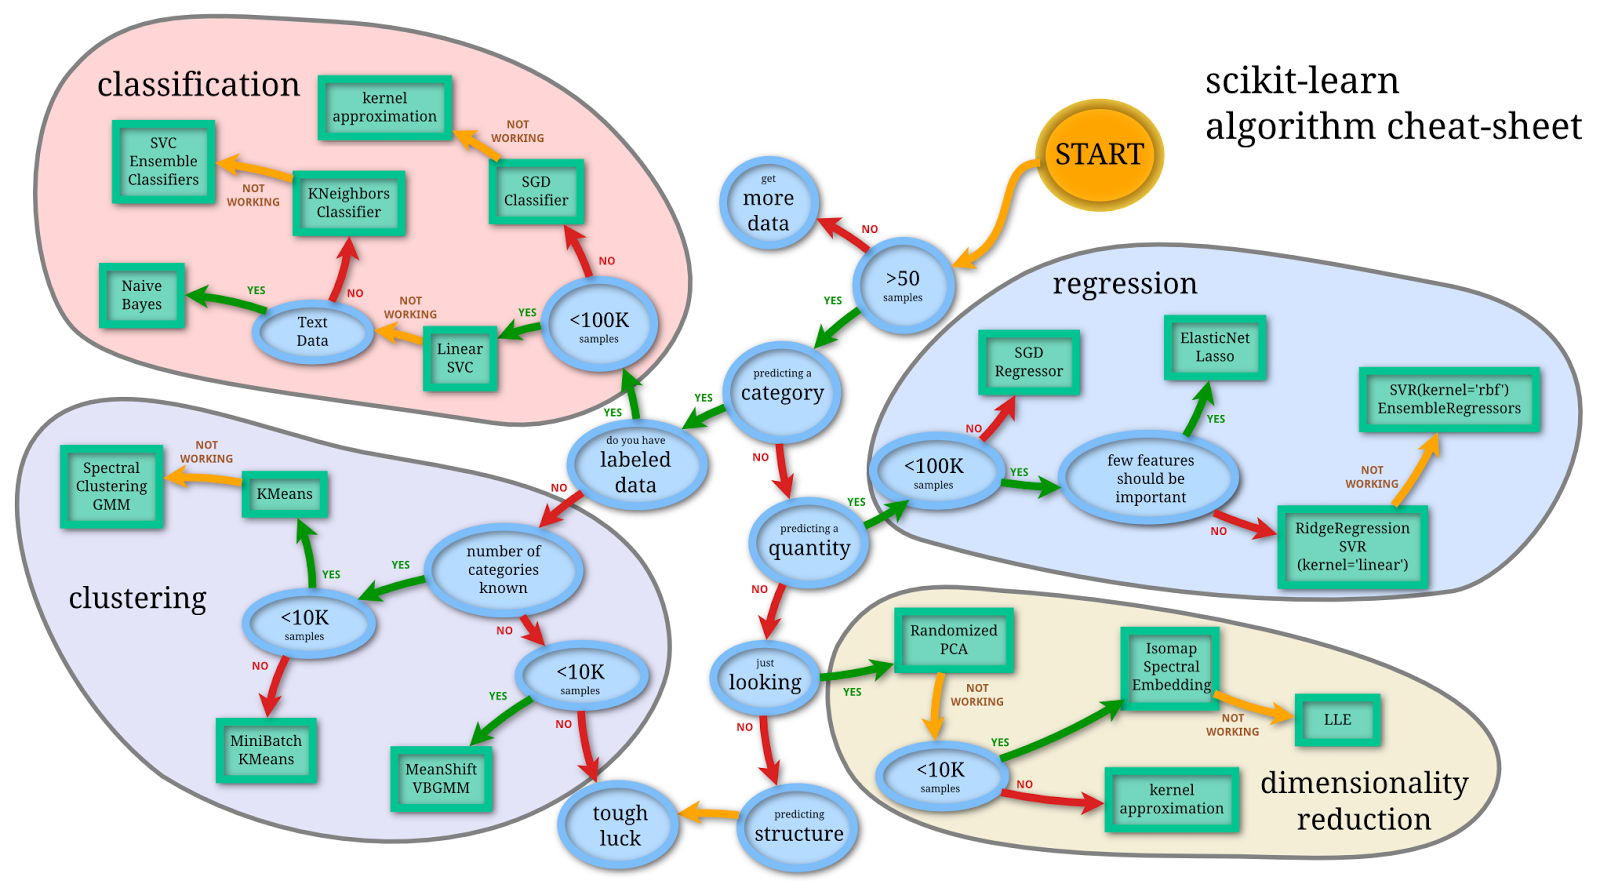

In [13]:
from IPython.display import Image
Image(filename = 'ML_Cheat_Sheet.png')

## Using this Scikit-Learn Cheat Sheet we can determine what the best method will be
### Following the path we get Support Vec tor Classification
### I am going to first test with SVC then compare to Naive Bayes and Random Forest

In [43]:
from sklearn.svm import SVC
from sklearn import metrics

svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(X_test,y_test)*100))

Test Accuracy of SVM Algorithm: 42.62%


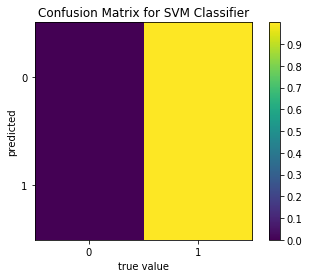

In [44]:
predicted = svm.predict(X_test)
cm = metrics.confusion_matrix(y_test, predicted)
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm_norm, interpolation='nearest')
ax.set_ylabel('predicted')
ax.set_xlabel('true value')
ax.set_xticks([i for i in range(2)])
ax.set_xticklabels([i for i in range(2)])
ax.set_yticks([i for i in range(2)])
ax.set_yticklabels([i for i in range(2)])
ax.set_title("Confusion Matrix for SVM Classifier")

cbar = fig.colorbar(cax, ticks=[i for i in np.arange(0, 1, 0.1)])
plt.show()

#It guessed that everything was a 1?

# Naive Bayes Theorem


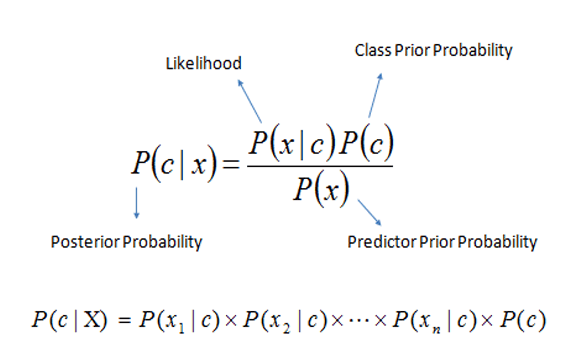

In [14]:
Image(filename = 'NB.png')

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(X_test,y_test)*100))

Accuracy of Naive Bayes: 78.69%


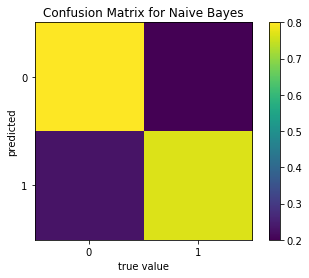

In [58]:
predicted = nb.predict(X_test)
cm = metrics.confusion_matrix(y_test, predicted)
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm_norm, interpolation='nearest')
ax.set_ylabel('predicted')
ax.set_xlabel('true value')
ax.set_xticks([i for i in range(2)])
ax.set_xticklabels([i for i in range(2)])
ax.set_yticks([i for i in range(2)])
ax.set_yticklabels([i for i in range(2)])
ax.set_title("Confusion Matrix for Naive Bayes")

cbar = fig.colorbar(cax, ticks=[i for i in np.arange(0, 1, 0.1)])
plt.show()

# Looks much better!

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(X_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 80.33%


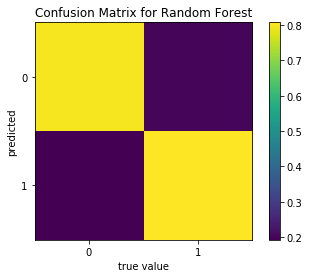

In [57]:
predicted = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, predicted)
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm_norm, interpolation='nearest')
ax.set_ylabel('predicted')
ax.set_xlabel('true value')
ax.set_xticks([i for i in range(2)])
ax.set_xticklabels([i for i in range(2)])
ax.set_yticks([i for i in range(2)])
ax.set_yticklabels([i for i in range(2)])
ax.set_title("Confusion Matrix for Random Forest")

cbar = fig.colorbar(cax, ticks=[i for i in np.arange(0, 1, 0.1)])
plt.show()

#Best so far

In [52]:
# Random Forest Visualization

estimator = rf.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

#code from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

#Could be useful if really wanted to dive deep into the model

# Decision Tree Analysis

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test, y_test)*100))

Decision Tree Test Accuracy 77.05%


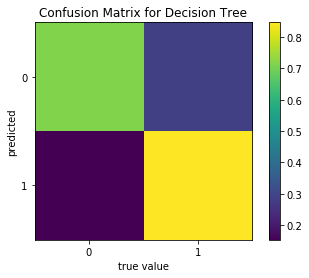

In [56]:
predicted = dtc.predict(X_test)
cm = metrics.confusion_matrix(y_test, predicted)
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm_norm, interpolation='nearest')
ax.set_ylabel('predicted')
ax.set_xlabel('true value')
ax.set_xticks([i for i in range(2)])
ax.set_xticklabels([i for i in range(2)])
ax.set_yticks([i for i in range(2)])
ax.set_yticklabels([i for i in range(2)])
ax.set_title("Confusion Matrix for Decision Tree")

cbar = fig.colorbar(cax, ticks=[i for i in np.arange(0, 1, 0.1)])
plt.show()

#Good at predicting heart disease (1) but struggles with no heart disease (0)

In [60]:
# Going to continue with random forest since that was the best outcome
perm = PermutationImportance(rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

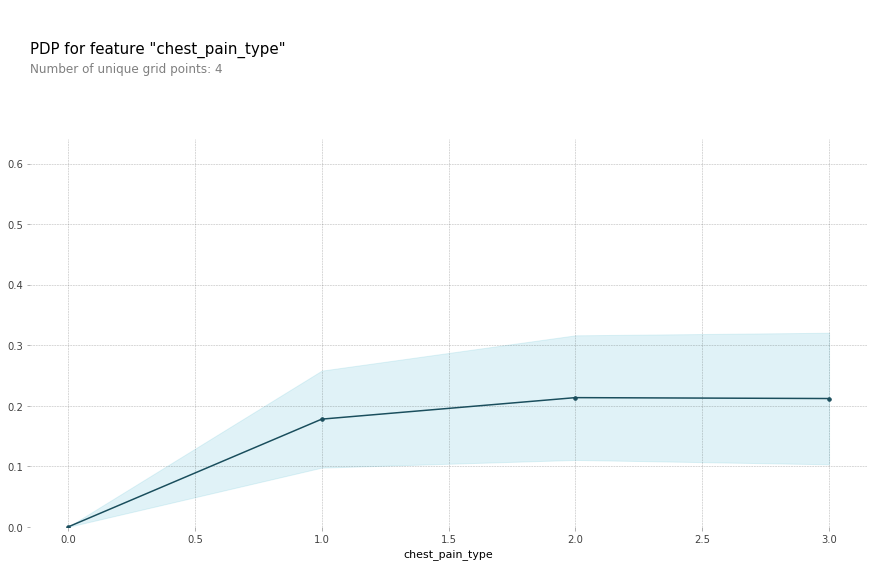

In [61]:
# These plots vary a single variable in a single row across a range of values and 
# see what effect it has on the outcome. It does this for several rows and plots the average effect. 
# Let's take a look at the 'num_major_vessels' variable, which was at the top of the permutation 
#importance list

base_features = df1.columns.values.tolist()
base_features.remove('target')

feat_name = 'chest_pain_type'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

# This indicates that as chest prin increases, the likelyhood of having heart disease increases
# Makes sense

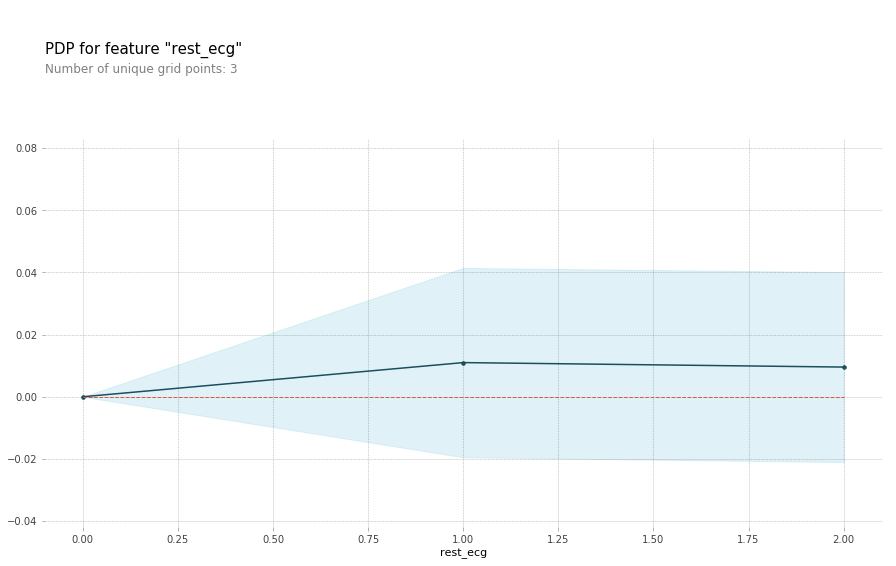

In [62]:
feat_name = 'rest_ecg'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

# With how large of a variance there is (blue region) It seems that this 
# criteria is not really of dependency on the chances of having heart disease

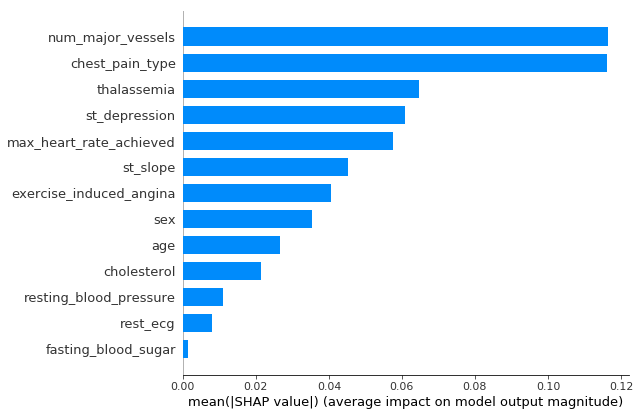

In [63]:
# showing the influence of the values of every variable in a single row, compared to their baseline values

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")


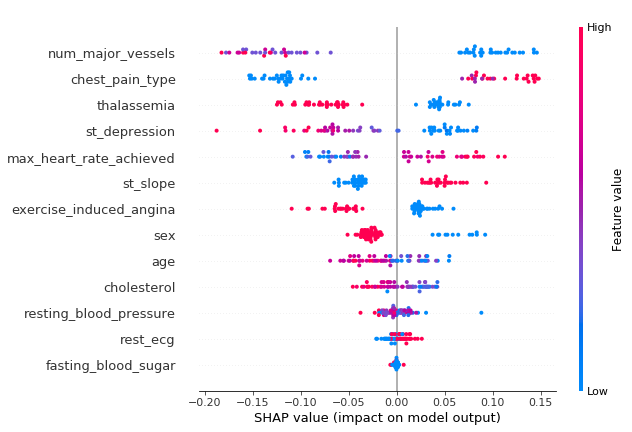

In [64]:
shap.summary_plot(shap_values[1], X_test)


In [65]:
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])